# Stars

## Project C131

### Getting Data

In [17]:
import pandas

stars_data_frame = pandas.read_csv(r'data\final_data_cleaned.csv')
stars_data_frame.drop(['Unnamed: 0'], axis=1, inplace=True)
stars_data_frame['Radius'] = stars_data_frame['Radius'].apply(
    lambda x: x.replace('$', '').replace(',', '')).astype('float')


### Converting Solar Mass and Radius into KM & KG

In [18]:
radius = stars_data_frame['Radius'].to_list()
mass = stars_data_frame['Mass'].to_list()
gravity = []


def convert_to_si(radius, mass):
    for i in range(0, len(radius)-1):
        radius[i] = radius[i] * 6.957e+8
        mass[i] = mass[i] * 1.989e+30


convert_to_si(radius, mass)


### Calculating Gravity

In [19]:
def gravity_calculation(radius, mass):
    G = 6.674e-11
    for index in range(0, len(mass)):
        g = (mass[index] * G) / ((radius[index]) ** 2)
        gravity.append(g)


gravity_calculation(radius, mass)

stars_data_frame["Gravity"] = gravity
stars_data_frame.to_csv("data/stars_with_gravity.csv")


## Project C132

### Getting Data

In [20]:
import pandas
import matplotlib.pyplot as plt
%matplotlib inline

gravity_stars_data_frame = pandas.read_csv("data/stars_with_gravity.csv")

mass = gravity_stars_data_frame["Mass"].to_list()
radius = gravity_stars_data_frame["Radius"].to_list()
distance = gravity_stars_data_frame["Distance"].to_list()
gravity = gravity_stars_data_frame["Gravity"].to_list()

mass.sort()
radius.sort()
gravity.sort()


### Mass vs Radius

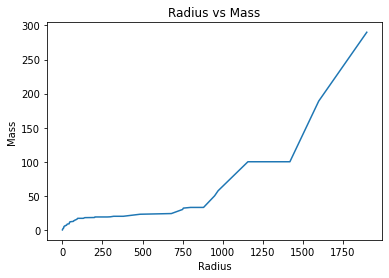

In [21]:
plt.plot(radius, mass)

plt.title("Radius vs Mass")
plt.xlabel("Radius")
plt.ylabel("Mass")
plt.show()


### Mass vs Gravity

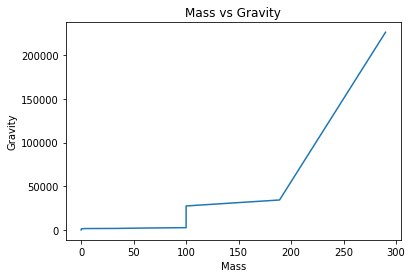

In [22]:
plt.plot(mass,gravity)

plt.title("Mass vs Gravity")
plt.xlabel("Mass")
plt.ylabel("Gravity")
plt.show()

### Scatter Mass vs Radius

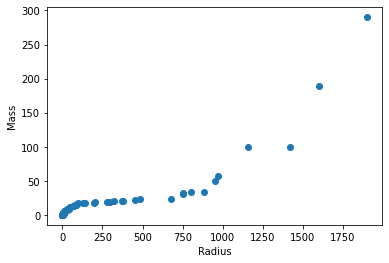

In [23]:
plt.scatter(radius,mass)
plt.xlabel("Radius")
plt.ylabel("Mass")
plt.show()

## Project C133

### Clustering

In [24]:
from sklearn.cluster import KMeans

X = gravity_stars_data_frame.iloc[:, [3, 4]].values

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append((kmeans.inertia_))


### Graph for Clustering

In [ ]:
plt.plot(range(1, 11), wcss)
plt.title("Elbow Method")
plt.xlabel('Number of clusters')
plt.show()
